## Step 0. configurations

In [31]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. importing data and libraries

In [32]:
# DataFrame related
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Data
df = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

## Step 2. exploring the data

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic exploration

In [34]:
df.shape

(891, 12)

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### More in-depth analysis

column types

In [38]:
# converting columns' dtypes to 'object' if they are categorical
df["Survived"] = df["Survived"].astype("object")
df["Pclass"] = df["Pclass"].astype("object")
df["SibSp"] = df["SibSp"].astype("object")
df["Parch"] = df["Parch"].astype("object")

# getting columns based on dtype, and dropping un-useful columns (for visualisation)
categorical_columns = df.select_dtypes(include="object").columns \
    .drop(["Name", "Cabin", "Ticket"])
numerical_columns = df.select_dtypes(include="number").columns \
    .drop("PassengerId")

# printing columns based on dtype
print(f"categorical: {categorical_columns}")
print(f"numerical: {numerical_columns}")

categorical: Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')
numerical: Index(['Age', 'Fare'], dtype='object')


## Step 3. visualising

### Distributions of numerical columns

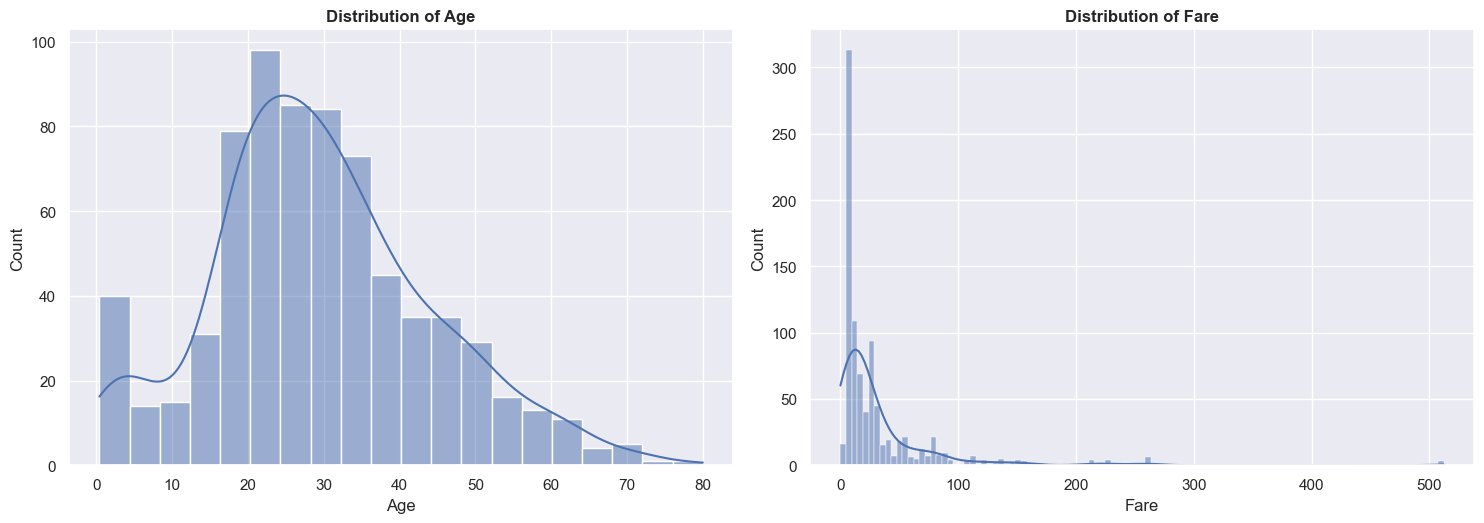

In [39]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

### Distributions of categorical columns

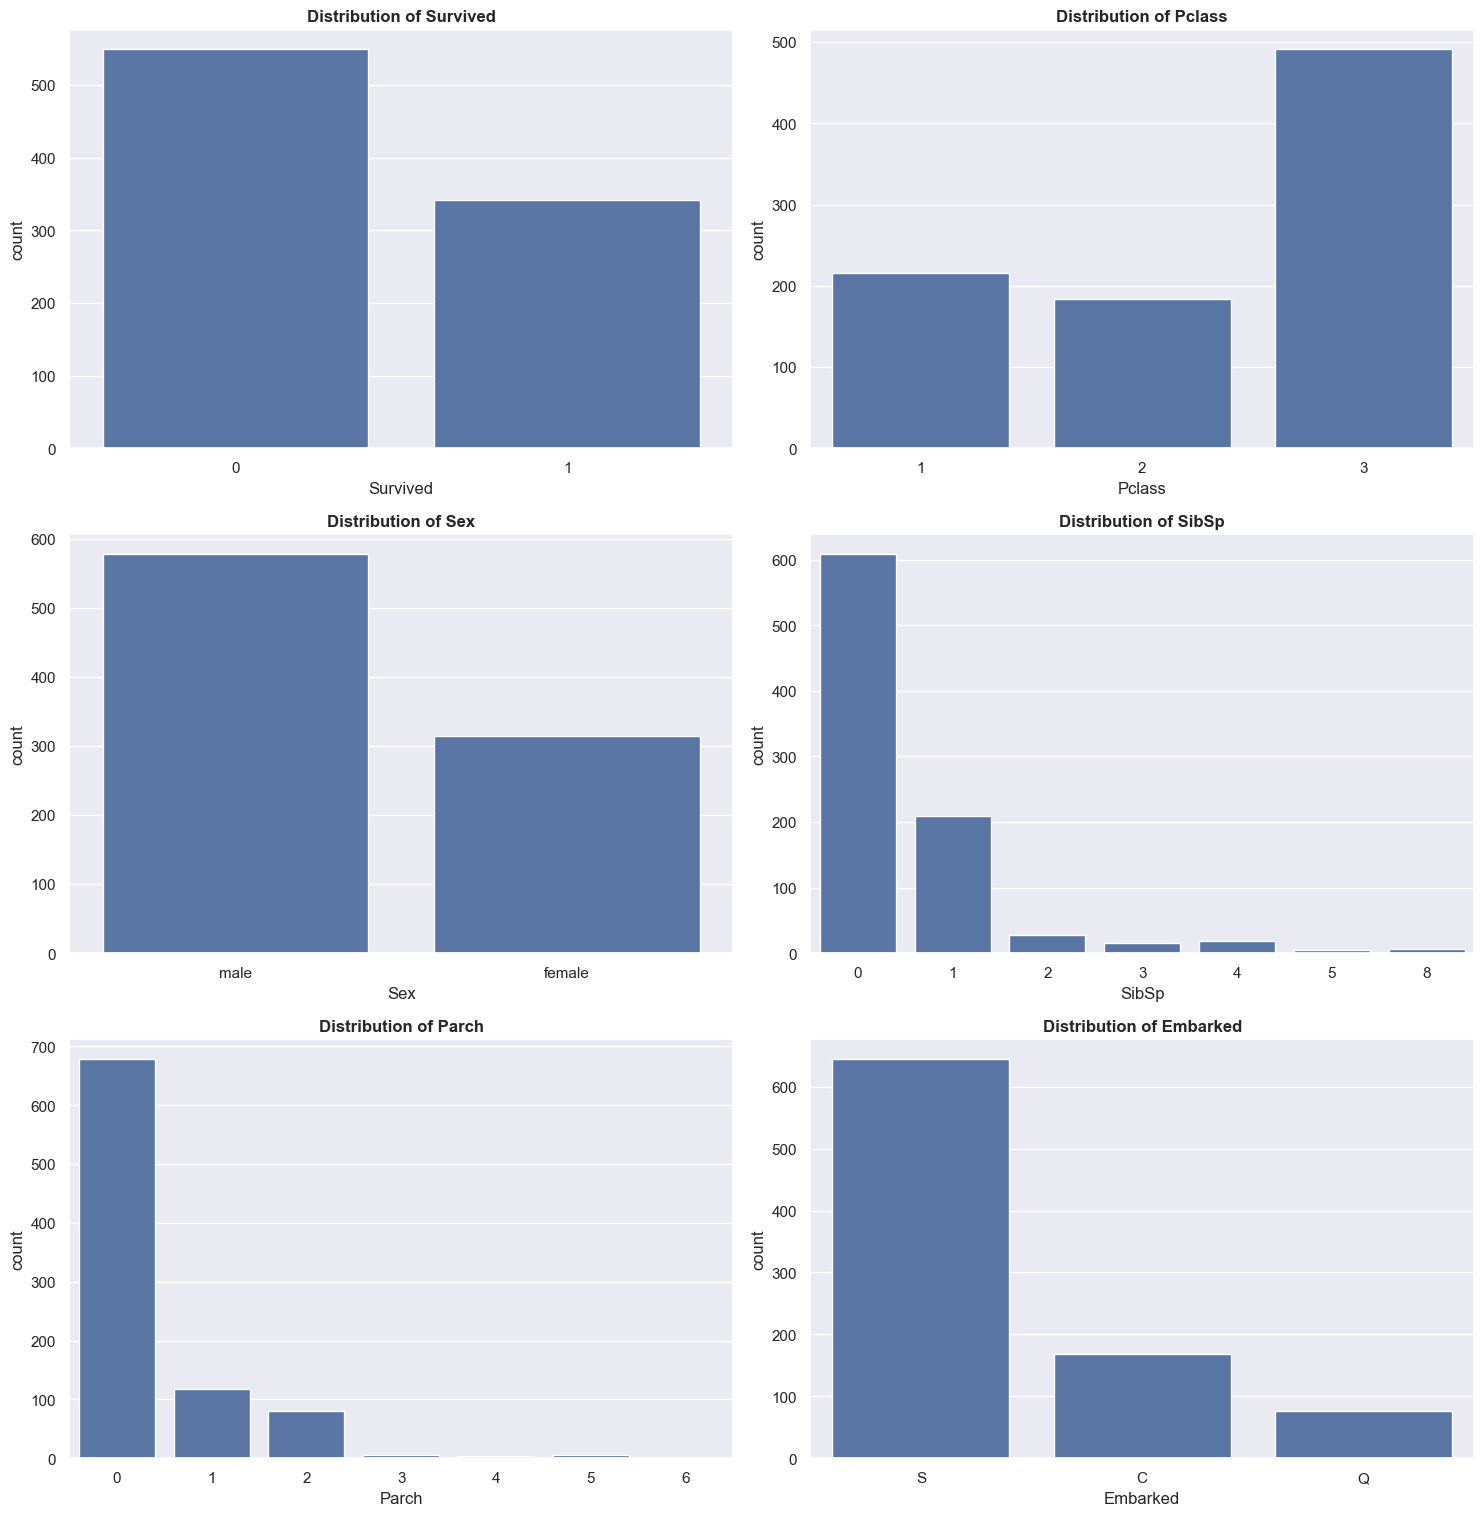

In [40]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.countplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

## Step 4. pre-processing

In [41]:
def clean(data):

    # drop not useful columns
    columns_to_delete = ["PassengerId", "Ticket", "Name"]
    for col in columns_to_delete:
        if col in data.columns:
            data = data.drop(col, axis=1)
    
    # deal with missing data
    data["Embarked"].fillna("U", inplace=True)
    data["Age"].fillna(data["Age"].mean(), inplace=True)

    return data

# clean both DataFrames
cdf = clean(df)
ctest = clean(test)

Setting `df` to the cleaned training data

In [42]:
df = cdf
test = ctest

### missing values

In [43]:
missing_values = df.isna().sum()

pd.DataFrame({"feature":missing_values.index, "missing":missing_values.values}) \
    .reset_index(drop=True) \
    .sort_values(by="missing", ascending=False)

,feature,missing
7,Cabin,687
0,Survived,0
1,Pclass,0
2,Sex,0
3,Age,0
4,SibSp,0
5,Parch,0
6,Fare,0
8,Embarked,0


**0** missing values because we addressed them in the `clean()` function

except for `Cabin`, but that is dealt with in the next section

## Step 5. Feature Engineering

In [44]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


In [45]:
import sys
sys.path.append("./util/")

from feature_engineering import feature_engineer

In [46]:
# add new columns to both DataFrames
FE_df = feature_engineer(df)
FE_test = feature_engineer(test)

Setting `df` to the feature-engineered training data

In [47]:
df = FE_df
test = FE_test

In [48]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Cabins_booked,Embarked_in_Cherbourg,...,Age_Group_Child,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Senior,Fare_Group_Low,Fare_Group_Mediun,Fare_Group_High,Fare_Group_Very High,Age_Class,Fare_per_person
0,0,3,22.0,1,0,7.2500,2,0,0,0,...,0,1,0,0,1,0,0,0,66.0,3.625
1,1,1,38.0,1,0,71.2833,2,0,1,1,...,0,0,1,0,0,0,1,0,38.0,35.64165
2,1,3,26.0,0,0,7.9250,1,1,0,0,...,0,1,0,0,1,0,0,0,78.0,7.925
3,1,1,35.0,1,0,53.1000,2,0,1,0,...,0,0,1,0,0,0,1,0,35.0,26.55
4,0,3,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,1,0,0,0,105.0,8.05


## Step 6. modelling

The goal for this dataset is to create a classification model that can predict the column `Survived`

### Import modelling libraries

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping

    # Optimizers
from tensorflow.keras.optimizers import Adam

    # Regularizers
from keras.regularizers import l2

### Preparing the data

In [50]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Cabins_booked,Embarked_in_Cherbourg,...,Age_Group_Child,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Senior,Fare_Group_Low,Fare_Group_Mediun,Fare_Group_High,Fare_Group_Very High,Age_Class,Fare_per_person
0,0,3,22.0,1,0,7.25,2,0,0,0,...,0,1,0,0,1,0,0,0,66.0,3.625


Making sure both DataFrames have the same number of columns

In [51]:
missing_cols_from_test_dataset = []

for element in list(df.columns):
    if element not in list(test.columns):
        if not element == "Survived":       # should not be in test dataset anyway
            print(element)
            missing_cols_from_test_dataset.append(element)
    
for col in missing_cols_from_test_dataset:
    test[col] = 0

Embarked_in_Unknown


Label Encoding

In [52]:
# `Survived` is already encoded

Splitting the data

In [53]:
X = df.drop(columns=["Survived"], axis=1)
y = df["Survived"]

train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=287)

Scale the data

In [55]:
scaler = MinMaxScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

In [56]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_class = to_categorical(y_train)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(X_train_stand.shape)
print(X_test_stand.shape)
print(test.shape)

(712, 24)
(179, 24)
(712, 24)
(179, 24)
(418, 24)


### **Sequential()**

1. Architecture

In [58]:
def get_model():

    model = Sequential()
    n_cols = X_train_stand.shape[1]

    print(n_cols)

    model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001) , input_shape=(n_cols,)))
    model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.001) ))
    model.add(Dense(8, activation="relu", kernel_regularizer=l2(0.001) ))
    model.add(Dense(2, activation="softmax"))

    return model

model_1 = get_model()

24


2. Compile and Fit

In [59]:
# Define a custom optimizer with a different learning rate
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model_1.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

early_stopping =  EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)
fit_1 = model_1.fit(X_train_stand, y_train_class, 
        epochs=1000, batch_size=32, validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0   # hides training process
    )

### **Sequential() with `Dropout()`**

1. Architecture

In [60]:
def get_model():

    model = Sequential()
    n_cols = X_train_stand.shape[1]

    print(n_cols)

    model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001) , input_shape=(n_cols,)))
    model.add(Dropout(0.3))

    model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.001) ))
    model.add(Dropout(0.3))

    model.add(Dense(2, activation="softmax"))

    return model

model_2 = get_model()

24


2. Compile and Fit

In [61]:
# Define a custom optimizer with a different learning rate
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model_2.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


early_stopping =  EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)
fit_2 = model_2.fit(X_train_stand, y_train_class, 
        epochs=1000, batch_size=32, validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0   # hides training process
    )

### **Sequential() with `Dropout()` and `BatchNormalization()`**

1. Architecture

In [62]:
def get_model():

    model = Sequential()
    n_cols = X_train_stand.shape[1]

    print(n_cols)

    model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001), input_shape=(n_cols,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(8, activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(4, activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(2, activation="softmax"))

    return model

model_3 = get_model()

24


2. Compile and Fit

In [63]:
# Define a custom optimizer with a different learning rate
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model_3.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


early_stopping =  EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)
fit_3 = model_3.fit(X_train_stand, y_train_class, 
        epochs=1000, batch_size=32, validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0   # hides training process
    )

`axhlines`

In [64]:
axh_ml = 0.39
axh_mvl = 0.47
axh_ma = 0.87
axh_mva = 0.81

## Step 7: comparing all models

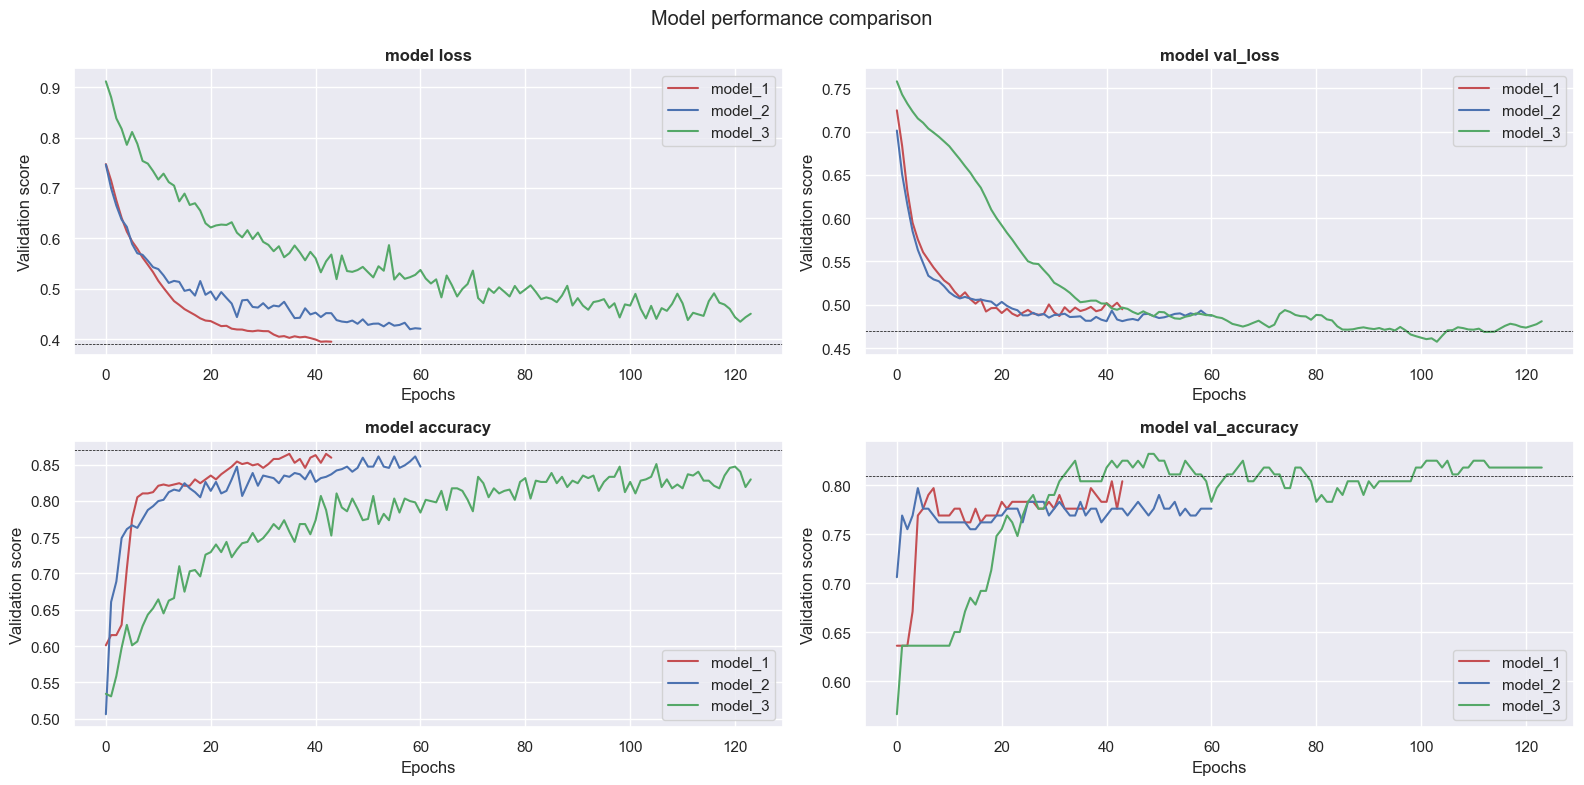

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# PLOT 1
ax[0,0].plot(fit_1.history["loss"], 'r', 
         fit_2.history["loss"], 'b',
         fit_3.history["loss"], 'g',
         )
ax[0,0].set_title('model loss', fontweight = "bold")
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Validation score')
ax[0,0].legend(['model_1', 'model_2', 'model_3'], loc='upper right')
ax[0,0].axhline(axh_ml, color='black', linestyle='--', linewidth=.5)


# PLOT 2
ax[0,1].plot(fit_1.history["val_loss"], 'r', 
         fit_2.history["val_loss"], 'b',
         fit_3.history["val_loss"], 'g',
         )
ax[0,1].set_title('model val_loss', fontweight = "bold")
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Validation score')
ax[0,1].legend(['model_1', 'model_2', 'model_3'], loc='upper right')
ax[0,1].axhline(axh_mvl, color='black', linestyle='--', linewidth=.5)


# PLOT 3
ax[1,0].plot(fit_1.history["accuracy"], 'r', 
         fit_2.history["accuracy"], 'b',
         fit_3.history["accuracy"], 'g',
         )
ax[1,0].set_title('model accuracy', fontweight = "bold")
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Validation score')
ax[1,0].legend(['model_1', 'model_2', 'model_3'], loc='lower right')
ax[1,0].axhline(axh_ma, color='black', linestyle='--', linewidth=.5)


# PLOT 4
ax[1,1].plot(fit_1.history["val_accuracy"], 'r', 
         fit_2.history["val_accuracy"], 'b',
         fit_3.history["val_accuracy"], 'g',
         )
ax[1,1].set_title('model val_accuracy', fontweight = "bold")
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Validation score')
ax[1,1].legend(['model_1', 'model_2', 'model_3'], loc='lower right')
ax[1,1].axhline(axh_mva, color='black', linestyle='--', linewidth=.5)


fig.suptitle("Model performance comparison")
plt.tight_layout()
plt.show()

## Step 7b. Ensemble methods

### Voting Ensemble

In [66]:
from scipy.stats import mode

# Collect predictions from your models
model1_preds = model_1.predict(test)
model2_preds = model_2.predict(test)
model3_preds = model_3.predict(test)

# Combine predictions using majority voting
ensemble_preds = mode([model1_preds, model2_preds, model3_preds], axis=0).mode

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [67]:
len(ensemble_preds)

418

## Step 8. make prediction on the test set with the most accurate model

Make predictions

In [68]:
# predictions = model_2.predict(test)
predictions = ensemble_preds

Round probabilities to either 0 or 1

In [69]:
binary_predictions = (predictions > 0.5).astype(int)

If your model outputs probabilities for both classes, you can get the class with the highest probability as the predicted class

In [70]:
predicted_classes = np.argmax(predictions, axis=1)

In [71]:
test_orig = pd.read_csv("./data/test.csv")


df_predictions = pd.DataFrame({
    "PassengerId": test_orig["PassengerId"],
    "Survived": predicted_classes
    })

df_predictions.to_csv("./submission/submission.csv", index=False)

In [72]:
test_orig.index

RangeIndex(start=0, stop=418, step=1)